# Линейная классификация: логистическая регрессия и метрики качества

## Дедлайн:
9 ноября, 23:59


![raven](./moon_raven.jpg)

В этом задании мы будем, используя метеоданные из Австралии, отвечать на вопрос: "будет ли завтра дождь". Построив модель, оценим её качество, используя пройденные метрики качества классификации. В качестве базовой модели предлагается использовать логистическую регрессию. Чтобы вспомнить о том, что значат все эти слова, можно ознакомиться с приложенными к заданию pdf, лекциями с 5 по 8 [данного плейлиста](https://www.youtube.com/playlist?list=PLEwK9wdS5g0oZwFwoQT-BrjmkazJWXxfe) или любыми другими источниками.

Импортируем библиотеки и прочитаем датасет:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

data = 'weatherAUS.csv'

df = pd.read_csv(data)

In [2]:
import warnings

warnings.filterwarnings('ignore')

### Знакомство с данными

In [3]:
# preview the dataset

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Признаки:

Location - The common name of the location of the weather station

MinTemp - The minimum temperature in degrees celsius

MaxTemp - The maximum temperature in degrees celsius

Rainfall - The amount of rainfall recorded for the day in mm

Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine - The number of hours of bright sunshine in the day

WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindGust9am - Direction of the wind at 9am

WindGust3pm - Direction of the wind at 3pm

WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am - Humidity (percent) at 9am

Humidity3pm - Humidity (percent) at 3pm

Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. 

Cloud3pm - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm

Temp9am - Temperature (degrees C) at 9am

Temp3pm - Temperature (degrees C) at 3pm

RainToday - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow - будет ли дождь завтра (целевая переменная).

#### 1. [0.5 балла] Посмотрите на баланс классов целевой переменной, постройте лучшую константную модель и выведите долю правильных ответов (accuracy) этой модели:

In [5]:
df["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Лучшая константная модель - возвращающая No

In [6]:
len(df[df["RainTomorrow"] == "No"])/len(df) #accuracy

0.7583940602227417

In [7]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Как мы видим, у нас в данных есть пропуски, и есть категориальные переменные, которые требуют предварительной подготовки для логистической регрессии.

#### 2. [1 балл] Разделите датасет на train и test в пропорции 80/20. Вспомните о важности перемешивания данных. Будем ли мы это делать сегодня? Почему?
Ответ: Да, необходимо перемешать, так как данные могут находиться в определенном порядке, который повлияет на результат обучения.

In [8]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 13)

### Категориальные признаки

In [10]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']
categorical.remove('RainTomorrow') # target
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


Прежде, чем преобразовывать категориальные признаки, неплохо бы понять их природу. Например, принципиально важно, сколько уникальных значений принимает каждый из них, от этого зависит способ обработки.  

#### 3. [0.5 балла]  Выведите число уникальных значений, которое принимает каждый категориальный признак.

In [11]:
for cat in categorical:
    print(cat, ":", df[cat].nunique())

Date : 3436
Location : 49
WindGustDir : 16
WindDir9am : 16
WindDir3pm : 16
RainToday : 2


#### 4. [1.5 балла]  Подготовьте категориальные признаки к дальнейшей работе: выберите для каждого из них способы кодирования и заполнения пропусков и реализуйте.

Подсказка: One Hot Encoding подойдет для большинства признаков, но не для всех.

Подсказка: Помните, что методы, заполняющие пропуски, обучаются только на train, применяются на train и test.

OHE подойдет для всех wind. Date можно заменить на месяц, так как по большей части именно от месяца зависит погода. RainToday и Location лучше закодировать с помощью lable encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

df["Date"] = pd.to_datetime(df['Date']).dt.month

df["RainToday"].fillna(df['RainToday'].mode().iloc[0], inplace = True)
df['RainToday'] = pd.DataFrame(LabelEncoder().fit_transform(df['RainToday']))

df['RainTomorrow'].fillna(df['RainTomorrow'].mode().iloc[0],inplace = True)
df['RainTomorrow'] = pd.DataFrame(LabelEncoder().fit_transform(df['RainTomorrow']))

df['Location'] = pd.DataFrame(LabelEncoder().fit_transform(df['Location']))

for feature in ["Evaporation", "WindGustDir","WindDir9am","Sunshine","WindDir3pm", "MinTemp","MaxTemp","Rainfall","WindGustSpeed","WindSpeed9am","WindSpeed3pm",'Humidity9am',"Humidity3pm","Pressure9am","Pressure3pm","Temp9am","Temp3pm"]:
    df[feature].fillna((df[feature]).mode().iloc[0],inplace = True)

df = pd.get_dummies(df, columns=['WindGustDir'])

df = pd.get_dummies(df, columns=['WindDir9am'])

df = pd.get_dummies(df, columns=['WindDir3pm'])

new_order = [col for col in df.columns if col != 'RainTomorrow'] + ['RainTomorrow']
df = df.reindex(columns=new_order)

In [13]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainTomorrow
0,12,2,13.4,22.9,0.6,4.0,0.0,44.0,20.0,24.0,...,0,0,0,0,0,0,0,1,0,0
1,12,2,7.4,25.1,0.0,4.0,0.0,44.0,4.0,22.0,...,0,0,0,0,0,0,0,0,1,0
2,12,2,12.9,25.7,0.0,4.0,0.0,46.0,19.0,26.0,...,0,0,0,0,0,0,0,0,1,0
3,12,2,9.2,28.0,0.0,4.0,0.0,24.0,11.0,9.0,...,0,0,0,0,0,0,0,0,0,0
4,12,2,17.5,32.3,1.0,4.0,0.0,41.0,7.0,20.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,6,41,2.8,23.4,0.0,4.0,0.0,31.0,13.0,11.0,...,0,0,0,0,0,0,0,0,0,0
145456,6,41,3.6,25.3,0.0,4.0,0.0,22.0,13.0,9.0,...,0,0,0,0,0,0,0,0,0,0
145457,6,41,5.4,26.9,0.0,4.0,0.0,37.0,9.0,9.0,...,0,0,0,0,0,0,0,1,0,0
145458,6,41,7.8,27.0,0.0,4.0,0.0,28.0,13.0,7.0,...,0,0,0,0,0,0,0,0,0,0


### Числовые признаки

In [14]:
# find numerical variables

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 16 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [15]:
# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,4.0,0.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,4.0,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,4.0,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,4.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,4.0,0.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [16]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  145460.0  145460.0  145460.0     145460.0  145460.0       145460.0   
mean       12.0      23.0       2.0          5.0       4.0           40.0   
std         6.0       7.0       8.0          3.0       5.0           13.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          4.0       0.0           31.0   
50%        12.0      22.0       0.0          4.0       0.0           37.0   
75%        17.0      28.0       1.0          5.0       9.0           46.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      145460.0      145460.0     145460.0     145460.0     145460.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         20.0          7.0   
mi

Некоторые (или все?) числовые признаки содержат пропуски, некоторые могут содержать выбросы.

#### 5. [0.5 балла]  Посмотрите на вывод метода describe. Какие признаки скорее всего содержат выбросы?  

Подсказка: предлагается найти до 4х таких столбцов.

Ответ: Те признаки, у которых максимальное значение и 0.75 квантиль сильно отличаются. Это RainFall, Evaporation, WindGustSpeed, WindSpeed9am

#### 6. [0.5 балла] Найдите выбросы и удалите их

Подсказка: попробуйте построить гистограммы, вспомните, что такое boxplot и как он строится

In [17]:
for x in numerical[:-1]:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

#### 7. [1 балл]  Заполните пропуски в числовых признаках. 

In [18]:
for num in numerical:
    df[num].fillna(df[num].mean(), inplace = True)

#### 8. [0.5 балла] Сделайте нормализацию данных перед обучением.

In [19]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler().fit_transform(df)

array([[1.        , 0.04166667, 0.53314917, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.04166667, 0.36740331, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.04166667, 0.51933702, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.45454545, 0.85416667, 0.3121547 , ..., 1.        , 0.        ,
        0.        ],
       [0.45454545, 0.85416667, 0.37845304, ..., 0.        , 0.        ,
        0.        ],
       [0.45454545, 0.85416667, 0.57458564, ..., 0.        , 0.        ,
        0.        ]])

#### 9. [0.5 балла] Обучите логистическую регрессию на полученном датасете.

In [20]:
from sklearn.linear_model import LogisticRegression

X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

clf = LogisticRegression().fit(X_train, y_train)
prediction = clf.predict(X_test)
clf.score(X_test,y_test)

0.831706311013337

#### 10. [0.5 балла] Посчитайте accuracy, precision и recall на обучающей и тестовой выборке.

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

prediction_train = clf.predict(X_train)

accuracy_train = accuracy_score(y_train, prediction_train)
precision_train = precision_score(y_train, prediction_train)
recall_train = recall_score(y_train, prediction_train)

print("Обучающая выборка: \n Accuracy :",  accuracy_train, "Precision :", precision_train, "Recall :", recall_train)

accuracy_test = accuracy_score(y_test, prediction)
precision_test = precision_score(y_test, prediction)
recall_test = recall_score(y_test, prediction)

print("Тестовая выборка: \n Accuracy :",  accuracy_test, "Precision :", precision_test, "Recall :", recall_test)


Обучающая выборка: 
 Accuracy : 0.8316633438746047 Precision : 0.6909221431834497 Recall : 0.4161556603773585
Тестовая выборка: 
 Accuracy : 0.831706311013337 Precision : 0.7023903335960073 Recall : 0.4154109057014137


#### 11. [1 балл] Попробуйте обучить несколько классификаторов, изменяя параметр регуляризации C. Сравните метрики. О чем говорят результаты?

Ответ: результаты почти одинаковые, но при c = 1.8 побольше точность

In [22]:
small_c = np.arange(0.1, 2, 0.1)
big_c = np.arange(10, 20, 1)
c = np.concatenate([small_c, big_c])
for c_ in c:
    clf = LogisticRegression(C=c_).fit(X_train, y_train)
    prediction = clf.predict(X_test)
    print('Accuracy',clf.score(X_test,y_test),', c =',c_)

Accuracy 0.8315688161693936 , c = 0.1
Accuracy 0.8319125532792521 , c = 0.2
Accuracy 0.8320156744122096 , c = 0.30000000000000004
Accuracy 0.8318438058572803 , c = 0.4
Accuracy 0.8316719373023511 , c = 0.5
Accuracy 0.8317750584353086 , c = 0.6000000000000001
Accuracy 0.8324281589440397 , c = 0.7000000000000001
Accuracy 0.8313625739034787 , c = 0.8
Accuracy 0.8318094321462945 , c = 0.9
Accuracy 0.831706311013337 , c = 1.0
Accuracy 0.830640725972776 , c = 1.1
Accuracy 0.831500068747422 , c = 1.2000000000000002
Accuracy 0.8322906641000962 , c = 1.3
Accuracy 0.8317750584353086 , c = 1.4000000000000001
Accuracy 0.8318094321462945 , c = 1.5
Accuracy 0.8317406847243228 , c = 1.6
Accuracy 0.8320156744122096 , c = 1.7000000000000002
Accuracy 0.832771896053898 , c = 1.8
Accuracy 0.831500068747422 , c = 1.9000000000000001
Accuracy 0.8318438058572803 , c = 10.0
Accuracy 0.8312250790595352 , c = 11.0
Accuracy 0.8322562903891104 , c = 12.0
Accuracy 0.8319125532792521 , c = 13.0
Accuracy 0.8320500481

Логистическая регрессия предсказывает не просто классы, а их вероятности, поэтому полезно посчитать метрику, не зависящую от выбора порога для классификации:

#### 12. [0.5 балл] Выберите лучшую из получившихся моделей, посчитайте AUC-ROC. 

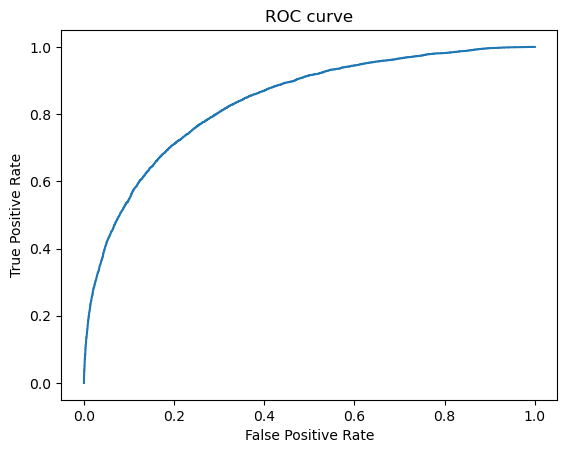

In [23]:
from sklearn import metrics
import matplotlib.pyplot as plt


clf = LogisticRegression(C = 1.3).fit(X_train, y_train)
scores = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,scores)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC curve')
plt.show()

In [24]:
metrics.roc_auc_score(y_test,scores)

0.8367717195271611

#### 13. [1 балл] Если AUC-ROC > 0.85. Можете продолжать улучшать модель, если это необходимо.

Одним из преимуществ линейных моделей является то, что после обучения можно оценить вклад каждого признака.

#### 14. [0.5 балл] Какие признаки получились самыми важными? Напишите топ-3:
Ответ:

In [42]:
coefs = clf.coef_
res = []
for i in range(67):
    res.append((X.columns[i], abs(coefs[0][i])))
res.sort(key = lambda x: x[1], reverse = True)

res

[('Cloud3pm', 0.12598379567799017),
 ('Cloud9am', 0.07882695713501332),
 ('WindGustSpeed', 0.05437803930326293),
 ('Humidity3pm', 0.05010346845002523),
 ('Sunshine', 0.04966899175901826),
 ('Pressure3pm', 0.043246376980154155),
 ('MinTemp', 0.03897757666228478),
 ('Date', 0.03698391572337769),
 ('Pressure9am', 0.035064110299419235),
 ('RainToday', 0.03152931044043148),
 ('WindSpeed3pm', 0.016598131275950233),
 ('Humidity9am', 0.010926607782670853),
 ('WindDir3pm_NW', 0.008620606787580698),
 ('Temp3pm', 0.007728825953978908),
 ('WindDir3pm_NNW', 0.007612772831670573),
 ('MaxTemp', 0.007423913697658254),
 ('WindDir9am_N', 0.007136458987385585),
 ('WindDir3pm_SSE', 0.00682835087591928),
 ('WindDir3pm_N', 0.0067563039095229534),
 ('WindGustDir_NW', 0.006706418882224997),
 ('Evaporation', 0.006470326027468076),
 ('WindDir9am_NNE', 0.006293796877521266),
 ('WindDir3pm_WNW', 0.006118010012614223),
 ('WindDir9am_S', 0.005920094568611478),
 ('WindDir9am_SSE', 0.005608909901467823),
 ('WindGustD

Самые важные признаки: cloud3pm, cloud9am, windgustspeed

![burn](./display.jpeg)

#### Поделитесь впечатлениями от выполнения задания:

![burn](./dawg.jpg)

#### 15. [0.5 балла]: аккуратный код, красивые и подписанные графики и гистограммы
#### 16. [0.5 балла]: порекомендуйте преподавателю свой любимый фильм или сериал, чтобы он перестал вставлять в ноутбуки картинки из всякого старья. Будьте убедительны!
*Итого*: максимум 11/10

Офис вроде богат на разные мемы

![burn](./office.jpg)